## 14p Final Project (Data Analysis): Joshua Zempoalteca & Yara Currier-Herzallah

In [43]:
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

In [11]:
sub1hz440 = pd.read_csv('subj1freq440.csv')
sub1hz880 = pd.read_csv('subj1freq880.csv')
sub1hz1760 = pd.read_csv('subj1freq1760.csv')
sub2hz440 = pd.read_csv('subj2freq440.csv')
sub2hz880 = pd.read_csv('subj2freq880.csv')
sub2hz1760 = pd.read_csv('subj2freq1760.csv')

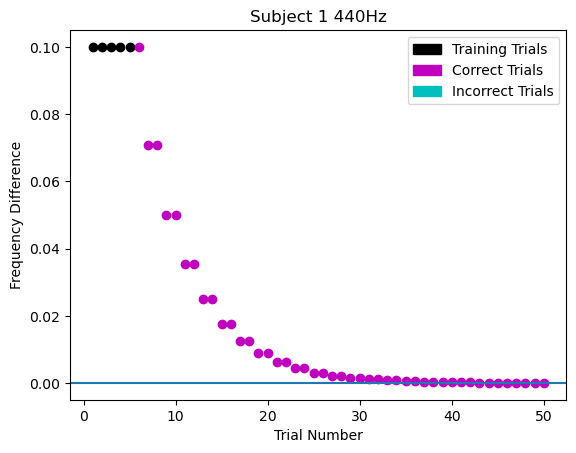

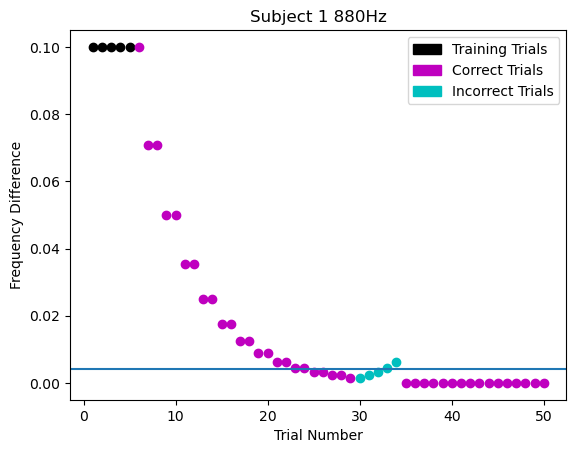

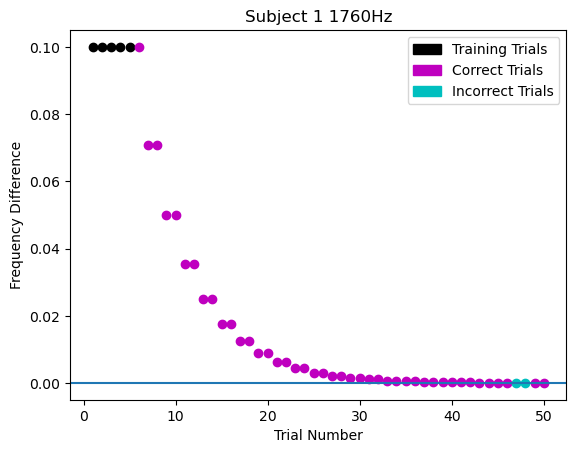

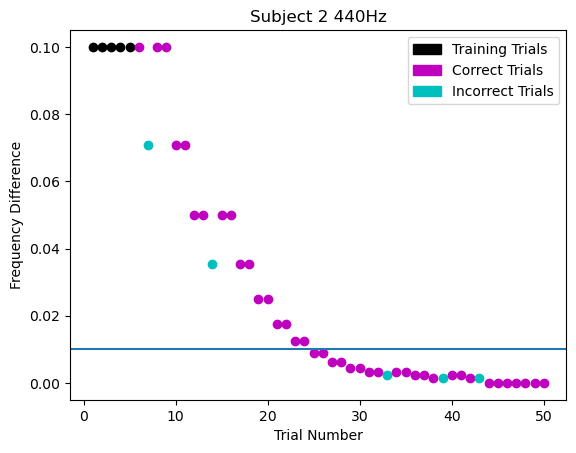

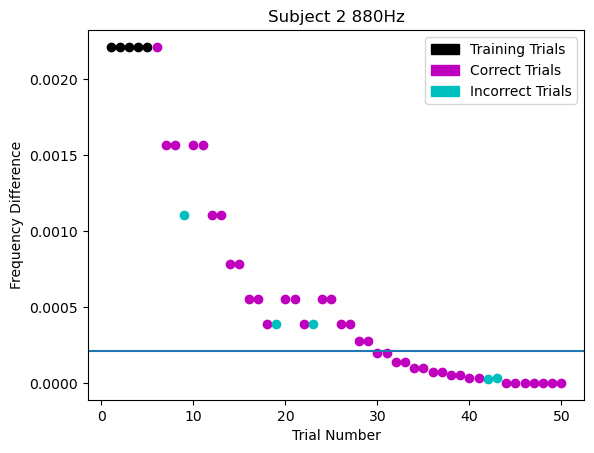

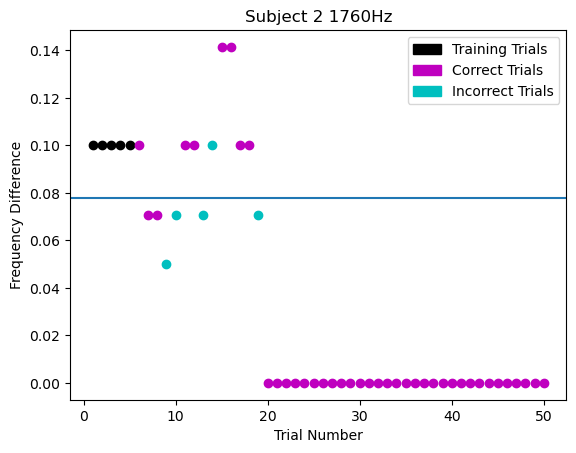

In [45]:
datasets = [sub1hz440, sub1hz880, sub1hz1760, sub2hz440, sub2hz880, sub2hz1760]
subjectTaskAndName = ['Subject 1 440Hz', 'Subject 1 880Hz', 'Subject 1 1760Hz', 'Subject 2 440Hz', 'Subject 2 880Hz', 'Subject 2 1760Hz']
trialCondition = ('Test, Condition 1', 'Condition 2')
title_index = 0
training_color = 'k'
correct_color = 'm'
incorrect_color = 'c'

for task in datasets: 
    correctResponse = np.array(task['Condition'])
    trialResponse = np.array(task['Response'])
    frequencyDifference = np.array(task['Frequency Difference'])
    x_val = [0]
    y_val = [0]
    wrongTrials = []

    plt.figure()
    ax.set_xlabel('Trial Number')
    ax.set_ylabel('Frequency Difference')
    plt.title(subjectTaskAndName[title_index]) 
    
    for trial in range(0,5):
        x_val[0] = trial + 1
        y_val[0] = frequencyDifference[trial]
        plt.plot(x_val, y_val, markeredgecolor='k', markerfacecolor='k', marker='o', label='Training Trials')

    
    for trial in range(5,50): 
        x_val[0] = trial + 1
        y_val[0] = frequencyDifference[trial]
        #print(x_val, y_val)
        if correctResponse[trial] == trialResponse[trial]:
            plt.plot(x_val, y_val, markeredgecolor='m', markerfacecolor='m', marker='o', label='Correct Trials')
        else:
            plt.plot(x_val, y_val, markeredgecolor='c', markerfacecolor='c', marker='o', label='Incorrect Trials')
            wrongTrials.append(frequencyDifference[trial])
    
    if len(wrongTrials)>0: 
        wrongTrials.pop(0)        
        threshold = np.mean(wrongTrials)
    else: 
        threshold = 0 
    
    plt.axhline(y=threshold)

    ax = fig.add_axes([0.0,0.0,1.0,1.0])
    plt.xlabel('Trial Number')
    plt.ylabel('Frequency Difference')

    training_patch = mpatches.Patch(color=training_color, label='Training Trials')
    correct_patch = mpatches.Patch(color=correct_color, label='Correct Trials')
    incorrect_patch = mpatches.Patch(color=incorrect_color, label='Incorrect Trials')

    plt.legend(handles=[training_patch, correct_patch, incorrect_patch])
    
    title_index += 1